In [ ]:
# 303 Tips

# Imputing
    # KNNImputer from 303-1 notes
        # Using same k for all columns is fine 
        
# Check with .unique() to see if columns make sense

# Check correlation - Should be able to drop ~200 columns this way

# Start with feature importance models (DecisionTree and MARS)
    # Stick to the predictors with higher importances - select some subsets
    
# Start writing tuning code
    # RF
    # MARS
    # AdaBoost
    # XGBoost
    
# SET UP GOOGLE COLLAB

# Week 8: Ensembles

# Can bag with other models (not tree- model not covered for classification)

In [1]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn import impute
import itertools as it
import time as time
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

data = pd.read_csv('train.csv')

#Create cluster dummies
from sklearn.cluster import KMeans, DBSCAN
# clusters = KMeans(random_state=0, n_clusters = 10)
# clusters.fit(data)

# pred = clusters.predict(data)
# data['Cluster'] = pred
# data.Cluster = data.Cluster.astype(str)

# Log transformation
y = np.log(data.y)
X = data.drop('y', axis=1)


# Drop columns with >5% NaN
inst = X.shape[0]
nan_col = [col for col in X if (X[col].isna().sum() / inst > 0.05)]
X = X.drop(nan_col, axis=1)


#Impute NaN using KNNImputer
imputer = impute.KNNImputer(n_neighbors=5)
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(X)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,717,718,719,720,721,722,723,724,725,726
0,-1.731729,0.970650,-0.607871,1.646275,0.000475,1.290638,0.292676,-0.579861,-0.612177,-0.278328,...,-0.434068,2.883111,-0.234542,-0.392860,-0.732046,-0.281516,1.289516,-0.279573,-0.229378,-0.840794
1,-1.731085,-0.823592,-0.024523,-1.275256,-0.298702,-0.712843,-1.443005,0.958220,-0.101120,0.742470,...,-0.725169,-0.588173,0.721319,-0.266476,-0.908712,1.879752,-0.811894,1.770119,-0.758149,0.732472
2,-1.730441,-0.269384,-0.860578,-0.786297,-0.302801,-0.269982,-1.443005,-0.512824,-0.942933,-0.150716,...,0.556277,0.226029,-0.215916,-0.392868,0.186620,-0.169499,0.028670,-0.185334,-0.140474,-0.724503
3,-1.729797,-0.639873,0.145935,-0.676281,-0.294604,-0.447105,-1.443005,0.219178,-0.021785,-0.282743,...,0.775354,0.043078,-0.240469,-0.379623,-0.308046,-0.291399,-0.391612,-0.291352,-0.532588,0.275508
4,-1.729153,-0.299226,-0.891836,1.352899,-0.261818,-0.852600,-0.267221,-0.592556,-0.884625,-0.275005,...,-1.103301,-0.844447,-0.236236,-0.392867,-0.802712,-0.261748,-0.391612,-0.273683,0.361564,-0.932165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,1.729153,-0.811236,0.872754,0.387205,-0.282309,-1.070487,0.964553,-0.179294,0.701509,-0.288272,...,3.086159,2.417614,-0.240469,-0.392866,-1.014712,-0.297989,-0.811894,-0.291352,-0.668430,0.013262
5376,1.729797,0.893357,0.620776,0.668357,-0.212638,0.061688,0.236687,-0.265555,0.571452,-0.273831,...,-0.130962,-0.335720,-0.237929,-0.392870,-1.156045,-0.278221,0.869234,-0.267793,0.926481,-0.174443
5377,1.730441,-0.368885,0.746220,-0.065082,-0.257719,0.472798,0.516635,-0.374215,0.252689,-0.222228,...,-0.884225,-0.557841,-0.192210,-0.392871,0.681287,-0.153026,-0.811894,-0.126435,-0.544819,-0.128596
5378,1.731085,-0.052157,-0.713373,1.695171,-0.257719,-0.892355,0.180697,-0.595953,-0.742034,-0.278881,...,0.808365,-0.218928,-0.239622,-0.385486,-0.166713,-0.288105,0.028670,-0.279573,1.000389,-0.909079


## Imputation

29911


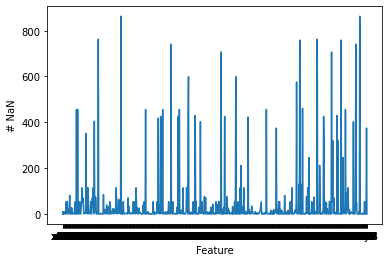

In [ ]:
plt.plot(data.isna().sum())
plt.xlabel('Feature')
plt.ylabel('# NaN')
print(data.isna().sum().sum())

## Response Range

In [ ]:
data.y.describe()

count    5380.000000
mean        8.630297
std        12.016238
min         1.000000
25%         2.000000
50%         5.000000
75%        10.000000
max       100.000000
Name: y, dtype: float64

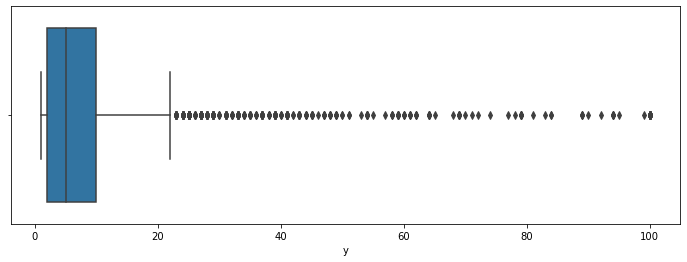

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data.y)

## Column Value Inspection


In [2]:
X = pd.DataFrame(X)
zero_var = []

print(X.shape)

res=[]
for col in X:
     if len(X[col].unique()) == 1:
        res.append(col)
        X = X.drop(col, axis=1)

print('Columns dropped:', len(res))
# 11 columns with only 1 value

print(X.shape)

(5380, 727)
Columns dropped: 11
(5380, 716)


In [ ]:
# Column Variance

In [ ]:
## Not working right now - is removing both

# Duplicated columns
duplicated_cols = X.columns[X.transpose().duplicated(keep='first')]
print(len(duplicated_cols))
print(duplicated_cols)

# Drop the duplicated columns
X.drop(duplicated_cols, axis=1, inplace=True)


print(X.shape)

84
Int64Index([ 68,  80, 110, 115, 118, 134, 164, 165, 173, 198, 200, 203, 206,
            207, 217, 223, 230, 266, 267, 268, 274, 284, 300, 323, 324, 334,
            335, 355, 360, 364, 365, 367, 380, 385, 399, 414, 419, 421, 422,
            430, 435, 438, 444, 449, 450, 458, 461, 468, 470, 471, 472, 474,
            516, 521, 523, 524, 527, 542, 550, 568, 569, 582, 587, 589, 592,
            595, 602, 603, 623, 630, 644, 648, 651, 655, 659, 671, 680, 689,
            706, 710, 716, 722, 723, 724],
           dtype='int64')
(5380, 632)


In [ ]:
X.T.drop_duplicates(keep='first').T

## Correlation Analysis

In [ ]:
# Correlation Analysis
data.corrwith(data.y).sort_values(ascending=False)[:20]

y       1.000000
x146    0.378696
x102    0.378436
x014    0.364737
x581    0.346539
x619    0.344101
x687    0.343842
x696    0.329630
x651    0.329630
x755    0.324916
x756    0.312253
x569    0.311497
x543    0.308728
x749    0.296195
x591    0.293075
x427    0.293073
x561    0.279915
x572    0.273481
x670    0.272551
x239    0.271268
dtype: float64

In [ ]:
perfect_corr = (abs(X.corr()) > 0.9)
(perfect_corr.sum().sum() - 755) / 2

7438.0

In [3]:
# Losing variation here?
def remove_collinear_features(x, threshold):
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x, drops

X, drops = remove_collinear_features(X, 0.8)

Removed Columns {8, 10, 11, 12, 21, 29, 30, 33, 34, 37, 38, 39, 40, 42, 44, 45, 50, 52, 53, 54, 55, 56, 57, 61, 62, 63, 64, 66, 68, 70, 75, 77, 79, 80, 83, 84, 86, 89, 90, 92, 94, 96, 97, 99, 101, 102, 103, 104, 107, 108, 110, 111, 113, 115, 117, 118, 120, 121, 124, 125, 128, 131, 133, 134, 135, 138, 139, 140, 141, 142, 143, 145, 146, 149, 150, 151, 152, 153, 154, 155, 156, 158, 160, 162, 164, 165, 166, 168, 169, 170, 173, 175, 176, 177, 178, 181, 182, 183, 186, 187, 188, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 246, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 272, 273, 274, 277, 278, 279, 280, 281, 282, 283, 284, 286, 287, 288, 290, 291, 292, 293, 295, 297, 299, 300, 301, 302, 304, 305, 307, 308, 310, 311, 312, 315, 316, 317

In [ ]:
X

,0,1,2,3,4,5,6,7,9,13,...,646,661,668,672,684,692,694,698,701,712
0,-1.731729,0.970650,-0.607871,1.646275,0.000475,1.290638,0.292676,-0.579861,-0.278328,-1.783015,...,-0.533122,0.449750,-0.470062,0.140353,-0.274980,-0.426247,-0.108640,-1.405697,0.080381,0.594887
1,-1.731085,-0.823592,-0.024523,-1.275256,-0.298702,-0.712843,-1.443005,0.958220,0.742470,0.212986,...,-0.169251,-0.866449,-1.672698,-2.138000,0.713741,-0.127829,-0.108640,0.133983,-2.404986,0.594887
2,-1.730441,-0.269384,-0.860578,-0.786297,-0.302801,-0.269982,-1.443005,-0.512824,-0.150716,0.087927,...,-0.645082,0.233639,-0.620089,0.013777,0.034913,-0.426247,-1.193997,-0.122631,0.123936,-0.328871
3,-1.729797,-0.639873,0.145935,-0.676281,-0.294604,-0.447105,-1.443005,0.219178,-0.282743,0.063436,...,-0.393171,0.679689,-1.229876,-0.703482,-0.352076,-0.426247,-0.182223,-0.379244,0.071829,0.594887
4,-1.729153,-0.299226,-0.891836,1.352899,-0.261818,-0.852600,-0.267221,-0.592556,-0.275005,0.189538,...,-0.449151,0.444824,0.110687,0.541174,-0.278549,2.557930,-0.329390,2.186889,0.200618,0.264974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,1.729153,-0.811236,0.872754,0.387205,-0.282309,-1.070487,0.964553,-0.179294,-0.288272,-0.568636,...,-0.337191,-1.955216,-1.026614,0.077065,-0.380381,-0.426247,0.351257,-0.122631,-0.142698,0.133008
5376,1.729797,0.893357,0.620776,0.668357,-0.212638,0.061688,0.236687,-0.265555,-0.273831,0.356805,...,-0.365181,-1.526738,-0.966119,0.625557,-0.315750,-0.426247,0.516820,-0.892470,0.038277,0.330956
5377,1.730441,-0.368885,0.746220,-0.065082,-0.257719,0.472798,0.516635,-0.374215,-0.222228,0.209860,...,-0.673072,0.746252,1.327842,0.393503,-0.271993,-0.426247,-0.844475,0.133983,0.041281,0.264974
5378,1.731085,-0.052157,-0.713373,1.695171,-0.257719,-0.892355,0.180697,-0.595953,-0.278881,0.552210,...,-0.505132,-1.357043,-0.421666,0.773228,-0.310071,-0.426247,-0.586933,-1.405697,0.028832,-0.130923


## Feature Importance

## PCA Dimension Reduction

In [ ]:
res = pd.DataFrame(columns=['Percent', 'Dim'])
for n in np.arange(0.95, 0, -0.05):
    pca = PCA(n_components = n, svd_solver = 'full')
    pca_data = pca.fit_transform(X)

    dim = pca_data.shape[1]
    res = res.append(pd.DataFrame({'Percent':n, 'Dim':dim}, index=[0]))
    
res = res.reset_index(drop=True)

Text(0, 0.5, 'Dimensions')

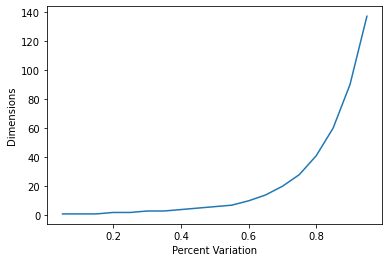

In [ ]:
plt.plot(res.Percent, res.Dim)
plt.xlabel('Percent Variation')
plt.ylabel('Dimensions')

In [4]:
pca = PCA(n_components = 0.9, svd_solver = 'full')
pca_data = pca.fit_transform(X)

dim = pca_data.shape[1]
X = pca_data
X.shape

(5380, 97)

## DBSCAN?

In [ ]:
# DBSCAN clustering
db = DBSCAN(eps=50, min_samples=2)
db.fit_predict(X)
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X = pd.DataFrame(X)
X.Cluster = db.labels_
X = pd.get_dummies(X)
X

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,10.781835,-10.550425,-1.389333,11.412608,-3.948730,0.184892,2.079231,-3.931734,0.882259,-0.292678,...,0.308264,-0.216018,0.046164,-0.064197,-0.052060,1.383777,0.782678,-0.844220,0.596582,-0.697189
1,-13.703336,0.700874,1.600031,-2.889409,5.369754,7.947973,0.806274,-2.257151,-1.315446,-2.476533,...,4.484327,-1.754804,-1.805732,-0.870102,-0.602934,-0.781125,4.719386,0.023884,0.813408,1.291091
2,3.462429,-9.296243,1.776078,-2.945392,0.591712,2.946641,-2.010665,4.974082,-1.538967,-2.179788,...,-0.615271,0.152359,0.110833,0.351977,-0.917847,-0.105817,0.647814,0.202271,-0.120393,0.264436
3,-4.334259,-4.577142,4.333773,-3.305378,-1.062078,-0.305052,2.860698,0.256052,0.939384,-2.921690,...,0.217654,0.908828,-0.440344,-0.598833,0.288496,-1.316715,1.020567,1.088397,0.094585,-0.904364
4,8.380139,-4.903977,-0.674055,-5.754902,4.575190,0.417406,-3.198909,2.866728,-8.067099,3.159759,...,-0.211351,2.108729,-0.738576,1.180693,-0.598859,1.186879,1.795002,-0.179036,0.260185,-1.661345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,-1.301857,-12.441267,6.887888,0.963782,-8.986152,2.616209,0.904449,3.240487,1.895097,-1.648082,...,-1.035582,-0.785636,0.561686,-0.522764,0.655445,-0.246902,-0.684642,1.358684,-0.723941,1.488930
5376,11.180929,-0.771640,6.697330,-3.333841,-0.178603,0.563499,-1.984782,0.664532,0.099215,-1.652088,...,0.414626,-0.474428,-0.698460,-0.351142,-0.151871,0.043417,0.541379,-0.663330,-0.531068,-0.296129
5377,-0.348706,-8.609050,6.310708,0.992539,5.211123,-2.689503,-4.325625,0.290483,-1.422859,0.870810,...,-0.770339,-0.250563,0.919247,-0.606629,1.581885,-0.162867,-0.270071,0.274389,0.385588,0.320263
5378,13.905367,-2.265077,-1.641486,-8.381800,-4.549641,1.352257,-3.287034,-0.714738,2.623186,2.368429,...,-0.132435,1.109315,1.145495,1.482847,-0.486009,-0.134528,-0.146896,0.391888,1.089321,-0.227498


## Lasso Modeling

In [ ]:
from sklearn.metrics import mean_absolute_error
np.warnings.filterwarnings('ignore')

#Tune alpha for lasso
alphas = np.arange(0, 1, 0.01)
score = pd.DataFrame(columns=['alpha', 'rmse'])
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    
    score = score.append(pd.DataFrame({'alpha':a, 'rmse':-cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error').mean()}, index=[0]))

score.reset_index(drop=True, inplace=True)
score
# score[score['rmse'].argmin()]

,alpha,rmse
0,0.00,106.872299
1,0.01,106.380806
2,0.02,106.031425
3,0.03,105.777853
4,0.04,105.581103
...,...,...
95,0.95,110.269018
96,0.96,110.313407
97,0.97,110.358386
98,0.98,110.402973


In [ ]:
score.loc[score['rmse'].argmin()]

alpha      0.120000
rmse     104.968214
Name: 12, dtype: float64

In [ ]:
# Need to select most important variables - Linear predictor Lasso
# lasso = Lasso(alpha=0.11)
lasso = Lasso(alpha=0.12)
lasso.fit(X, y)

Lasso(alpha=0.12)

In [ ]:
nonzero_ind = np.nonzero(lasso.coef_)[0]

# selected_features = features[nonzero_ind]
nonzero_coef = lasso.coef_[nonzero_ind]

In [ ]:
#Lasso selected linear features
# selected_features

In [ ]:
nonzero_coef

array([ 0.14275199, -0.23510107,  0.0277144 ,  0.19231137, -0.51833457,
        0.24334847, -0.09128751,  0.20724417,  0.53592502,  0.01858758,
        0.31715062, -0.2193871 , -0.34929397,  0.30907689,  0.0130048 ,
       -0.28564128,  0.52294982,  0.04038266, -0.00797741,  0.5975163 ,
        0.11208118,  0.38664439,  0.31635172, -0.19501142,  0.26545255,
       -0.22400024,  0.00765458,  0.08262229,  0.05121642, -0.21045143,
        0.16244109,  0.15750532,  0.12145783,  0.16813354, -0.18130663,
        0.02310353,  0.26982112, -0.08128102, -0.0313459 ,  0.50070969,
        0.24782428, -0.28985336, -0.0017511 ,  0.3020427 ,  0.11105345,
        0.18757939,  0.25868654,  0.09910263, -0.06519453,  0.13485489,
       -0.15899085, -0.26587851,  0.0760788 ,  0.32365502, -0.19365908,
       -0.15152307, -0.01420895, -0.41576724, -0.63889593,  0.04148288,
       -0.06306242, -0.41909471,  0.15760093, -0.05623522,  0.25332703,
       -0.21227349,  0.25595593,  0.11495935,  0.16910699,  0.20

In [ ]:
dfselected = pd.DataFrame({'Feature':selected_features, 'Coef':nonzero_coef})
dfselected.sort_values('Coef', ascending=False)

NameError: name 'selected_features' is not defined

In [ ]:
# Training on linear lasso regression
train_pred = lasso.predict(X)
train_rmse = np.sqrt(mean_squared_error(y, train_pred))
train_rmse

9.99099033685015

## Feature Importance

In [7]:
from sklearn.tree import DecisionTreeRegressor
X = pd.DataFrame(X)
features = X.columns

#Defining the object to build a regression tree
model = DecisionTreeRegressor(random_state=1, max_depth=10) 

#Fitting the regression tree to the data
model.fit(X, y)

DecisionTreeRegressor(max_depth=10, random_state=1)

In [8]:
dfimportances = pd.DataFrame({'Feature':features, 'Importance':model.feature_importances_})
dfimportances = dfimportances.sort_values('Importance', ascending=False)
nonzero = dfimportances[dfimportances['Importance'] > 0.01]
selected = X.loc[:, nonzero['Feature']]

X = selected
print(X.shape)
X

(5380, 17)


,0,27,4,3,19,23,82,21,17,83,1,89,34,78,73,44,57
0,-4.216445,-1.446733,2.627208,-3.581319,0.049754,-2.313434,0.775154,0.004809,0.540930,0.027618,2.495877,-0.090713,-0.293449,-1.153108,-0.379833,0.018940,0.619172
1,5.140446,1.663039,1.094582,-0.844141,-1.007747,-0.011230,-0.706094,0.654055,-0.225389,0.311117,-5.001596,-0.375138,-0.924607,-0.400816,0.089035,-0.760775,0.808711
2,-1.691202,1.557346,0.340869,0.355307,-0.220071,1.044560,0.391508,-2.189326,1.694945,-0.072165,-1.810675,0.083189,-1.017777,-0.470520,-0.289166,0.868379,0.249256
3,0.082068,0.620745,0.053721,-0.024098,-1.152237,0.742078,-0.754713,2.192277,0.599513,-1.416460,-1.129349,-1.198509,-0.281056,0.346986,-0.858476,0.360902,1.330526
4,-0.100408,1.022988,-3.607955,-1.772313,2.156620,0.969083,0.448184,-0.581930,-1.247286,0.001873,2.521909,1.045976,-1.004576,0.663698,1.200070,-0.355641,1.093060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,-6.051853,-0.015470,2.065510,0.926658,0.865128,0.652321,1.105818,2.837176,-1.053877,-0.412934,-4.311729,0.221589,1.418244,0.112751,0.685252,-0.466833,-1.638644
5376,-3.063057,1.592699,2.488758,0.105321,1.522261,-0.137987,-0.335089,0.049325,-0.161518,0.186035,1.531610,0.640383,0.870638,0.064573,-0.186071,-0.740833,-0.850912
5377,-1.147356,-0.221381,0.334721,-2.430359,0.635739,1.821866,-0.244164,-0.028878,-0.249185,-0.233368,-0.329800,-0.770135,0.711080,0.380176,0.590239,-0.568166,0.023760
5378,-4.393695,-0.585629,-0.167325,0.908254,-2.135821,-1.375929,-0.766120,-1.504066,2.443287,-0.536060,2.484050,-0.237645,-0.860227,1.330484,0.252563,-0.017245,-1.947680


In [9]:
print(dfimportances[dfimportances['Importance'] > 0.01].shape[0])


17


#### 18 Columns remain After correlation, pca, selection

## Segmented Regression

In [ ]:
clusters = KMeans(random_state=0, n_clusters = 2)
clusters.fit(X)

pred = clusters.predict(X)
X['Cluster'] = pred
X.Cluster = X.Cluster.astype(int)

X0 = X.loc[X.Cluster == 0].drop('Cluster', axis=1)
y0 = y.loc[y.index.isin(X0.index)]


X1 = X.loc[X.Cluster == 1].drop('Cluster', axis=1)
y1 = y.loc[y.index.isin(X1.index)]

In [ ]:
# Tune 2 seperate lassos
np.warnings.filterwarnings('ignore')

alphas = np.arange(0, 1, 0.01)
score = pd.DataFrame(columns=['alpha', 'rmse'])
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X0, y0)
    
    score = score.append(pd.DataFrame({'alpha':a, 'rmse':-cross_val_score(lasso, X0, y0, cv=5, scoring='neg_mean_squared_error').mean()}, index=[0]))

score.reset_index(drop=True, inplace=True)
score.loc[score['rmse'].argmin()]

model0 = lasso(alpha=0.01)

alpha    0.01000
rmse     0.55864
Name: 1, dtype: float64

In [ ]:
score = pd.DataFrame(columns=['alpha', 'rmse'])
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X1, y1)
    
    score = score.append(pd.DataFrame({'alpha':a, 'rmse':-cross_val_score(lasso, X1, y1, cv=5, scoring='neg_mean_squared_error').mean()}, index=[0]))

score.reset_index(drop=True, inplace=True)
score.loc[score['rmse'].argmin()]

alpha    0.020000
rmse     0.489813
Name: 2, dtype: float64

In [ ]:
model0 = lasso(alpha=0.01).fit(X0, y0)
model0 = lasso(alpha=0.02).fit(X1, y1)

# Not very helpful here...

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor


params = {'n_estimators': [500],
          'max_depth': [12,15,18],
          'max_leaf_nodes':[1100,1200,1300],
          'max_features': [0.2,0.4,0.6,0.8]}

# param_list=list(it.product(*(params[Name] for Name in params)))

# oob_score = [0]*len(param_list)
# i=0
# for pr in param_list:
#     model = RandomForestRegressor(random_state=1,oob_score=True,verbose=False,n_estimators = pr[0],
#                                  max_depth=pr[1],
#                                   max_leaf_nodes=pr[2],max_features=pr[3],
#                                   n_jobs=-1).fit(X,y)
#     oob_score[i] = model.oob_score_
#     i=i+1
    
# end_time = time.time()
# print("time taken = ", (end_time-start_time)/60, " minutes")
# print("Best params = ", param_list[np.argmax(oob_score)])
# print("Best score (R-squared) = ", np.max(oob_score))

#Strong overfitting - try k-fold?

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators': [400],
          'max_depth': [5,15,25],
          'max_leaf_nodes':[500,1000,1500],
          'max_features': [0.3, 0.6, 0.9]}

cv = KFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(RandomForestRegressor(), n_jobs=-1, param_grid=params, cv=cv, scoring='neg_mean_squared_error')
grid.fit(X, y)

grid.best_params_

/Users/lukelilienthal/opt/anaconda3/envs/main/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py:63: UserWarning: Failed to kill subprocesses on this platform. Please installpsutil: https://github.com/giampaolo/psutil
Details:
Traceback (most recent call last):
  File "/Users/lukelilienthal/opt/anaconda3/envs/main/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py", line 59, in _kill_process_tree_without_psutil
    _posix_recursive_kill(process.pid)
  File "/Users/lukelilienthal/opt/anaconda3/envs/main/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py", line 111, in _posix_recursive_kill
    ["pgrep", "-P", str(pid)], stderr=None, text=True
  File "/Users/lukelilienthal/opt/anaconda3/envs/main/lib/python3.6/subprocess.py", line 356, in check_output
    **kwargs).stdout
  File "/Users/lukelilienthal/opt/anaconda3/envs/main/lib/python3.6/subprocess.py", line 423, in run
    with Popen(*popenargs, **kwargs) as process:
TypeError: __init__()

KeyboardInterrupt: 

In [ ]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
rf = RandomForestRegressor(random_state=1,verbose=False,n_estimators = 400, max_depth=15,
                                  max_leaf_nodes=500,max_features=0.6,
                                  n_jobs=-1).fit(X,y)

np.sqrt(mean_squared_error(y, model.predict(X)))

0.4440577123502503

## Train rmse

In [ ]:
train_pred = model.predict(X)
train_rmse = np.sqrt(mean_squared_error(y, train_pred))
train_rmse

0.4010586422061422

## ADABoost?

## XGBoost

In [41]:
# Run with 17 predictors and 100 iterations (5cv) on colab (500)- 2 min
# Run with 17 predictors and All iterations (2cv) on colab (4374) -  16 min
# Run with 17 predictions and 1000 iterations (5cv) on colab (5000) - 30 min


# Coarse grid search
# Tune this
param_grid = {'max_depth': [4,6,8],
              'learning_rate': [0.01, 0.05, 0.1],
               'reg_lambda':[0, 1, 10],
                'n_estimators':[100, 500, 1000],
                'gamma': [0, 10, 100],
                'subsample': [0.5, 0.75, 1.0],
                'colsample_bytree': [0.5, 0.75, 1.0]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
optimal_params = RandomizedSearchCV(estimator=xgb.XGBRegressor(random_state=1),                                                       
                             param_distributions = param_grid,
                             n_iter=1000,
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv,
                             scoring = 'neg_mean_squared_error')
optimal_params.fit(X,y)
print("Optimal parameter values =", optimal_params.best_params_)
print("Optimal cross validation R-squared = ",optimal_params.best_score_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Optimal parameter values = {'subsample': 0.5, 'reg_lambda': 1, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.75}
Optimal cross validation R-squared =  -0.6293635387441705


In [56]:
#Finer grid 
param_grid = {'max_depth': [4, 5, 6],
              'learning_rate': [0.006, 0.008, 0.01],
               'reg_lambda':[1, 2, 3],
                'n_estimators':[1000],
                'gamma': [3, 4, 5],
                'subsample': [0.45, 0.5, 0.55],
                'colsample_bytree': [0.75, 0.8, 0.85]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1),                                                       
                             param_grid = param_grid,
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv,
                             scoring = 'neg_mean_squared_error')
optimal_params.fit(X,y)
print("Optimal parameter values =", optimal_params.best_params_)
print("Optimal cross validation R-squared = ",optimal_params.best_score_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Optimal parameter values = {'colsample_bytree': 0.85, 'gamma': 4, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'reg_lambda': 1, 'subsample': 0.5}
Optimal cross validation R-squared =  -0.6260674406599673


In [57]:
xg = optimal_params.best_estimator_

np.sqrt(mean_squared_error(np.exp(y), np.exp(xg.predict(X))))

9.210104159466688

## Neural Network

In [ ]:
# Learn how to tune this
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf
# tf.config.run_functions_eagerly(True) #Causing error for me

from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

network = Sequential()
network.add(InputLayer(input_shape=(191,)))
# network.add(Dense(500, activation='linear'))
# network.add(Dense(200, activation='relu'))
network.add(Dense(100, activation='relu'))
network.add(Dropout(0.3))
network.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
network.add(Dropout(0.3))
network.add(Dense(1, activation='linear'))

network.compile(loss='mse', optimizer='adam')

history = network.fit(X, y, epochs=50, batch_size=1000, validation_split=0.1,
                      callbacks=[EarlyStopping('val_loss', patience=int(10))])

nn = network

Train on 4842 samples, validate on 538 samples
Epoch 1/50
4842/4842 [==============================] - 1s 163us/step - loss: 7.9978 - val_loss: 3.1414
Epoch 2/50
4842/4842 [==============================] - 0s 16us/step - loss: 3.4895 - val_loss: 1.4964
Epoch 3/50
4842/4842 [==============================] - 0s 16us/step - loss: 2.5283 - val_loss: 1.5729
Epoch 4/50
4842/4842 [==============================] - 0s 16us/step - loss: 2.4632 - val_loss: 1.3928
Epoch 5/50
4842/4842 [==============================] - 0s 16us/step - loss: 2.1447 - val_loss: 1.0932
Epoch 6/50
4842/4842 [==============================] - 0s 14us/step - loss: 1.7047 - val_loss: 1.0286
Epoch 7/50
4842/4842 [==============================] - 0s 14us/step - loss: 1.6339 - val_loss: 1.0301
Epoch 8/50
4842/4842 [==============================] - 0s 14us/step - loss: 1.4777 - val_loss: 0.9913
Epoch 9/50
4842/4842 [==============================] - 0s 14us/step - loss: 1.4051 - val_loss: 0.9373
Epoch 10/50
4842/4842 [==

dict_keys(['val_loss', 'loss'])


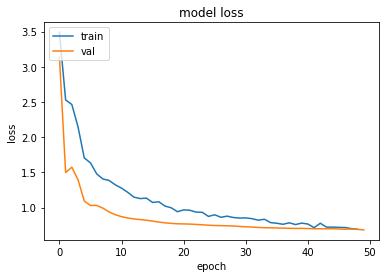

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Ensemble

In [ ]:
from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier

# RF, XGBoost, Neural Network, lasso
en = StackingRegressor(estimators = [('xgb', xg),('nn', nn),('rf', rf),('lasso', lasso)],
                     final_estimator=LinearRegression(),                                          
                    cv = KFold(n_splits = 5, shuffle = True, random_state=1))
en.fit(X,y)

en.coef_

(5380, 191)

## Segmented Regression

In [ ]:
#Based on clustering, run differently tuned regressions on groups


## Test Predictions

In [58]:
# Test Predictions
data = pd.read_csv('test.csv')
id = data.id

data = data.drop(nan_col, axis=1)

imputer = impute.KNNImputer(n_neighbors=5)
data = imputer.fit_transform(data)

# clusters = KMeans(random_state=0, n_clusters = 10)
# clusters.fit(data)
# pred = clusters.predict(data)
# data['Cluster'] = pred
# data.Cluster = data.Cluster.astype(str)

data = scaler.transform(data)

data = pd.DataFrame(data)

data = data.drop(res, axis=1)
data = data.drop(columns=drops, axis=1)

data = pca.transform(data)

data = pd.DataFrame(data)
data = data.loc[:, nonzero['Feature']]
print(data.shape)

test_pred = np.exp(xg.predict(data))
test_pred

(4403, 17)


array([5.4301934, 8.249057 , 2.5768306, ..., 6.8120832, 8.22978  ,
       8.248733 ], dtype=float32)

In [59]:
output = pd.DataFrame()
output['id'] = id
output['y'] = test_pred

output.loc[output['y']<0, 'y'] = 0
output.loc[output['y']>100, 'y'] = 100
output

,id,y
0,5380,5.430193
1,5381,8.249057
2,5382,2.576831
3,5383,5.787326
4,5384,6.868587
...,...,...
4398,9778,1.804357
4399,9779,6.549759
4400,9780,6.812083
4401,9781,8.229780


In [60]:
output = output.set_index('id')
# output.to_csv('Submissions/submission28.csv')
output.to_csv('submission34.csv')

In [ ]:
(test_pred > 100).sum()

2

## Clustering Ideas

In [ ]:
from sklearn.cluster import KMeans
clusters = KMeans(random_state=0, n_clusters = 10)
clusters.fit(data)

pred = clusters.predict(data)
data['Cluster'] = pred

pd.Series(pred).value_counts()

0    4118
8     542
6     332
3     207
5      95
1      46
4      22
9      13
2       3
7       2
dtype: int64

In [ ]:
data

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x758,x759,x760,x761,x762,x763,x764,x765,y,Cluster
0,0.0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,2.972810e+08,0.13,5.0,5.0,2.0,8.5127,14.28,-0.750000,5.0,6
1,1.0,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,3.320000e+12,0.08,661.0,0.0,350.0,1.5700,160.12,0.947097,1.0,0
2,2.0,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,1.004748e+08,0.39,39.0,2.0,18.0,9.6800,25.06,-0.490000,11.0,0
3,3.0,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,3.480000e+11,0.25,2.0,1.0,0.0,4.5316,117.76,1.640000,1.0,0
4,4.0,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,1.095466e+08,0.11,11.0,1.0,3.0,16.2717,5.81,-0.420000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375.0,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,1.586033e+08,0.05,0.0,0.0,0.0,2.7480,93.45,0.220000,4.0,0
5376,5376.0,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,3.608917e+07,0.01,6.0,4.0,4.0,23.6890,76.05,-0.900000,8.0,0
5377,5377.0,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,1.786891e+06,0.53,44.0,0.0,28.0,4.3710,80.30,-0.700000,21.0,0
5378,5378.0,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,1.940000e+11,0.29,3.0,2.0,2.0,24.6594,7.95,0.470000,13.0,0


In [ ]:
# More general clusters?
# DBSCAN?
data

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x758,x759,x760,x761,x762,x763,x764,x765,y,Cluster
0,0.0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,2.972810e+08,0.13,5.0,5.0,2.0,8.5127,14.28,-0.750000,5.0,6
1,1.0,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,3.320000e+12,0.08,661.0,0.0,350.0,1.5700,160.12,0.947097,1.0,0
2,2.0,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,1.004748e+08,0.39,39.0,2.0,18.0,9.6800,25.06,-0.490000,11.0,0
3,3.0,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,3.480000e+11,0.25,2.0,1.0,0.0,4.5316,117.76,1.640000,1.0,0
4,4.0,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,1.095466e+08,0.11,11.0,1.0,3.0,16.2717,5.81,-0.420000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375.0,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,1.586033e+08,0.05,0.0,0.0,0.0,2.7480,93.45,0.220000,4.0,0
5376,5376.0,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,3.608917e+07,0.01,6.0,4.0,4.0,23.6890,76.05,-0.900000,8.0,0
5377,5377.0,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,1.786891e+06,0.53,44.0,0.0,28.0,4.3710,80.30,-0.700000,21.0,0
5378,5378.0,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,1.940000e+11,0.29,3.0,2.0,2.0,24.6594,7.95,0.470000,13.0,0


In [ ]:
dim

227

In [ ]:
X.to_csv('updated_X_train.csv')
y.to_csv('logy.csv')
data.to_csv('updated_test.csv')